In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib_inline as mpl_inline
from matplotlib.axes import Axes 

# for vector image rendering of plots
mpl_inline.backend_inline.set_matplotlib_formats('svg')

# local stylesheet for latex plots
plt.style.use('./stylesheet/latex_style.mplstyle')


In [15]:
data_photon = pd.read_csv('data/emc_gamma.csv')
data_photon['particle'] = 'photon'
data_neutron = pd.read_csv('data/emc_neutron.csv')
data_neutron['particle'] = 'neutron'

data_neutron

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom,particle
0,49.9085,2.28061,0.201656,4,1,0.171442,1.000000,1.000000,0.845587,0.026810,0.681305,neutron
1,91.4437,50.85850,0.517213,14,1,0.196177,0.452177,0.947210,0.887481,0.024033,0.882948,neutron
2,21.5649,-15.09720,1.376870,22,2,0.629236,0.572265,0.880997,0.866884,0.015212,0.799525,neutron
3,92.4443,3.56594,0.956886,18,2,0.345639,0.542478,0.833899,0.734324,0.049628,0.908339,neutron
4,108.5060,-84.91500,0.759574,14,1,0.491971,0.930898,0.799791,0.883198,0.011530,0.944113,neutron
...,...,...,...,...,...,...,...,...,...,...,...,...
43507,125.2240,-51.63240,0.646651,11,1,0.406012,0.661388,0.961725,0.960797,0.001582,0.880944,neutron
43508,48.2575,23.30530,1.096160,19,1,0.514298,0.558028,0.919423,0.868519,0.008453,0.982199,neutron
43509,92.8038,-43.53270,0.995061,15,1,0.423894,0.457717,0.956714,0.944732,0.008081,0.712000,neutron
43510,119.4840,128.11100,0.229870,14,1,0.076507,0.492713,0.956878,0.325275,0.066628,0.996153,neutron


In [4]:
def normalize_data(data: pd.DataFrame):
    """Normalize data in DataFrame 'data' to have zero mean and unit standard deviation. Required for ML algorithms."""

    data_norm = pd.DataFrame()

    for column_name, column_content in data.items():
        if pd.api.types.is_numeric_dtype(column_content):
            data_norm[column_name] = ( column_content - column_content.mean() ) / column_content.std()
        else:
            data_norm[column_name] = column_content

    return data_norm


In [5]:
data_comb = pd.concat(
    objs = [data_photon, data_neutron],
    keys = ['photon', 'neutron'],
    names = ['particle', 'eventID']
)

data_comb_norm = normalize_data(data_comb)

In [6]:
data_photons = data_comb.loc['photon', :]
data_neutrons = data_comb.loc['neutron', :]

data_features = data_comb.columns.values.tolist()
print(data_features)

['Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom', 'particle']


In [28]:
def compare_distributions(
        dataframe_1: pd.DataFrame, 
        dataframe_2: pd.DataFrame, 
        features: list[str], 
        bins = 500, 
        x_labels = None, 
        legend_labels = ['dataframe 1', 'dataframe 2'], 
        hide_plot = False
        ):

    N_features = len(features)

    x_labels_ = features
    if x_labels is not None:
        x_labels_ = x_labels

    if (N_features % 2) == 0:
        n_rows = int(N_features / 2)
    else:
        n_rows = int(N_features // 2 + 1)

    fig, ax = plt.subplots(
        nrows = n_rows,
        ncols = 2,
        figsize = (10, n_rows * 4.8),
        squeeze = False,
        tight_layout = True
    ) 

    for axes, feature, xlabel in zip(ax.flatten(), features, x_labels_):
        data_df1 = dataframe_1[feature]
        data_df2 = dataframe_2[feature]
        
        axes.hist(data_df2, alpha = 0.4, bins = bins, color = 'tab:blue', label = legend_labels[1])
        axes.hist(data_df1, alpha = 0.4, bins = bins, color = 'tab:red', label = legend_labels[0])
        axes.set_yticklabels([])
        axes.set_xlabel(xlabel)

        axes.legend()
    
    if hide_plot:
        plt.close()

    return fig, ax

    

# All Features

In [35]:
fig_all, _ = compare_distributions(
    dataframe_1 = data_photons,
    dataframe_2 = data_neutrons,
    bins = 150,
    features = ['Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom'],
    hide_plot = True,
    legend_labels = ['photons', 'neutrons']
    )

fig_all.savefig('./feature_distributions/dist_all_feats.png', dpi = 400)


# Continuous Non-Discriminative Features

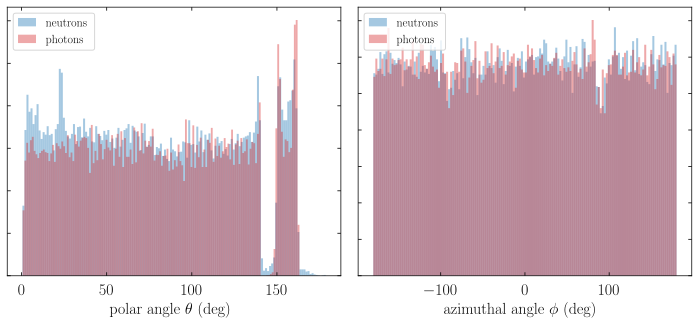

In [36]:
fig_Th_Ph, _ = compare_distributions(
    dataframe_1 = data_photons,
    dataframe_2 = data_neutrons,
    bins = 150,
    features = ['Th', 'Ph'],
    x_labels = ['polar angle $\\theta$ (deg)', 'azimuthal angle $\\phi$ (deg)'],
    hide_plot = False,
    legend_labels = ['photons', 'neutrons']
    )

fig_Th_Ph.savefig('./feature_distributions/dist_Th_Ph.png', dpi = 400)

# Discrete Non-Discriminative Features

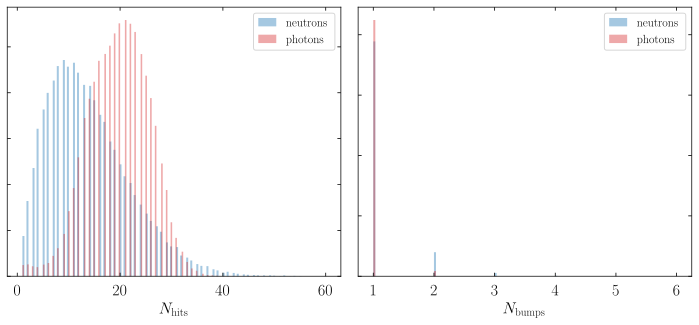

In [32]:
fig_NrHits_NrBumps, _ = compare_distributions(
    dataframe_1 = data_photons,
    dataframe_2 = data_neutrons,
    bins = 150,
    features = ['NrHits', 'NrBumps'],
    x_labels = [r'$N_\mathrm{hits}$', r'$N_\mathrm{bumps}$'],
    hide_plot = False,
    legend_labels = ['photons', 'neutrons']
    )

fig_NrHits_NrBumps.savefig('./feature_distributions/dist_NrHits_NrBumps.png', dpi = 400)


# Discriminative Features

In [33]:
fig, axes = compare_distributions(
    dataframe_1 = data_photons,
    dataframe_2 = data_neutrons,
    features = ['E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom'],
    bins = 150,
    x_labels = ['energy deposit $E_1$ (GeV)', r'ratio $E_{1}/E_{9}$', r'ratio $E_{9}/E_{25}$', r'zernike moment $Z_{20}$', r'zernike moment $Z_{53}$', 'lateral moment'],
    hide_plot = True, 
    legend_labels = ['photons', 'neutrons']
    )

axes[0,0].set_xlim(0,5)
axes[0,1].set_xlim(0,1)
axes[1,0].set_xlim(0.6,1)
axes[1,1].set_xlim(0,1)
axes[2,0].set_xlim(0,0.15)
axes[2,1].set_xlim(0,1)

fig
fig.savefig('./feature_distributions/dist_disc_feats.png', dpi = 400)

# Discriminative but Correlated Features

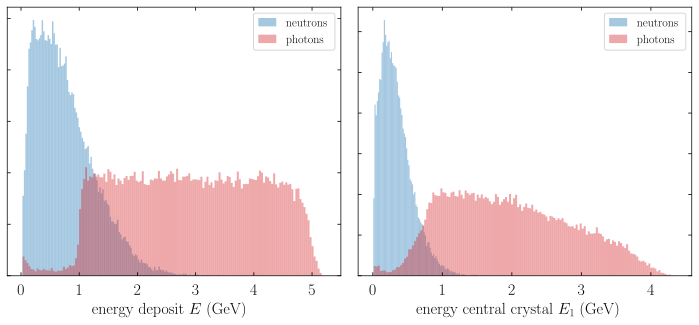

In [34]:
fig_E_E1, _ = compare_distributions(
    dataframe_1 = data_photons,
    dataframe_2 = data_neutrons,
    bins = 150,
    features = ['E', 'E1'],
    x_labels = ['energy deposit $E$ (GeV)', 'energy central crystal $E_1$ (GeV)'],
    hide_plot = False,
    legend_labels = ['photons', 'neutrons']
    )

fig_E_E1.savefig('./feature_distributions/dist_E_E1.png', dpi = 400)

# Correlation of Continious Discriminative Features

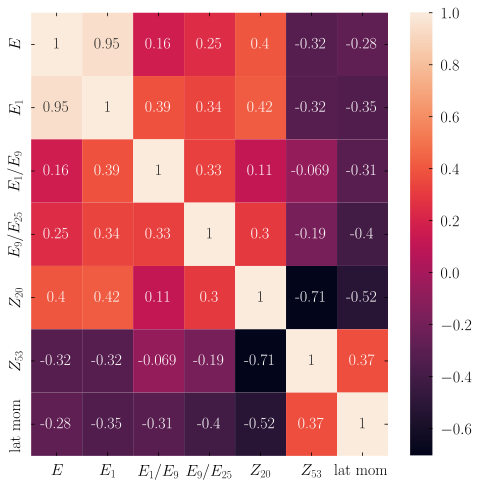

In [24]:
correlation = data_comb_norm[['E', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation, 
    annot=True,
    xticklabels=['$E$', '$E_1$', r'$E_{1}/E_{9}$', r'$E_{9}/E_{25}$', r'$Z_{20}$', r'$Z_{53}$', 'lat mom'],
    yticklabels=['$E$', '$E_1$', r'$E_{1}/E_{9}$', r'$E_{9}/E_{25}$', r'$Z_{20}$', r'$Z_{53}$', 'lat mom']
    )
plt.show()
